In [34]:
# Import Libraries
import os
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import calendar

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Clenup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst data
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [35]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

df_DA_explode = df_DA.explode('job_skills')

df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no',
                         columns='job_skills',
                         values='job_title_short',
                         aggfunc='size').fillna(0).astype(int)

df_DA_pivot.loc['Total'] = df_DA_pivot.sum(numeric_only=True)
df_DA_pivot= df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


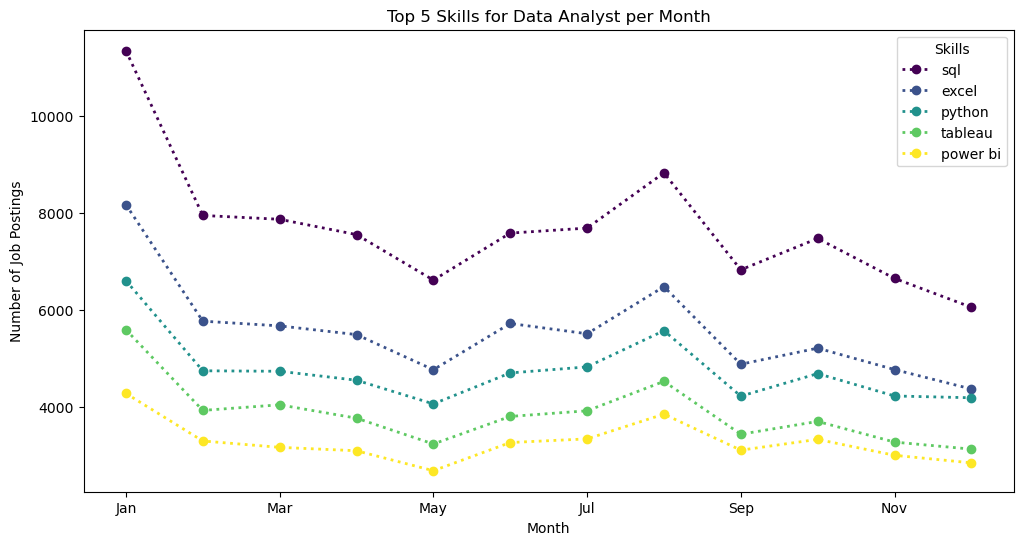

In [36]:
# Reset index to ensure 'job_posted_month_no' is a column
df_DA_pivot = df_DA_pivot.reset_index()

# Convert month number to month abbreviation (e.g., 'Jan', 'Feb', ...), only if not already abbreviated
def to_month_abbr(x):
    if pd.isnull(x):
        return x
    if isinstance(x, str) and x in calendar.month_abbr:
        return x
    try:
        return calendar.month_abbr[int(x)]
    except Exception:
        return x

df_DA_pivot['job_posted_month_no'] = df_DA_pivot['job_posted_month_no'].apply(to_month_abbr)

# Set month as categorical with correct order (abbreviations)
month_abbr_order = list(calendar.month_abbr[1:])
df_DA_pivot['job_posted_month_no'] = pd.Categorical(df_DA_pivot['job_posted_month_no'], categories=month_abbr_order, ordered=True)

df_DA_pivot = df_DA_pivot.sort_values('job_posted_month_no')

# Set the month abbreviation as index for plotting
df_DA_pivot = df_DA_pivot.set_index('job_posted_month_no')
ax = df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=2,
    linestyle=':', # options: '-', '--', '-.', ':'
    marker='o',# options: 'o', 's', '^', etc.
    colormap='viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
    figsize=(12, 6))
plt.title('Top 5 Skills for Data Analyst per Month')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.legend(df_DA_pivot.iloc[:, :5].columns, title='Skills')
plt.show()